In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
import matplotlib.pyplot as plt
import cv2
import sys
import os

In [2]:
# 폴더에서 이미지 불러오기
# IMG_DIR = 'D:/Ai/project/emotion_detection_dataset/fer2013/train/Angry/' #폴더 위치
# cnt = 1
# plt.figure(figsize = (30,30))
# for dirname, _, filenames in os.walk(IMG_DIR):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))
#         if cnt >25:
#             continue
#         plt.subplot(5,5,cnt)
#         imgfile = dirname+'/'+filename
#         img = plt.imread(imgfile)
#         plt.imshow(img,cmap = 'bone')
#         plt.grid(False)
#         cnt += 1

In [3]:
dir = "D:/Ai/dataset"

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_gen = ImageDataGenerator(rescale= 1/255., #0~1사이의 값으로 정규화                                                                                                                   
                               #rotation_range=0.2, #random
                               #width_shift_range=0.2, #좌우 이동
                               #height_shift_range=0.2, #상하 이동
                               #zoom_range = 0.2, 
                               horizontal_flip=True,
                               validation_split = 0.02) #2%

test_gen = ImageDataGenerator(rescale= 1/255.,
                              validation_split = 0.2)

In [6]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (180,180),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (180,180),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 9461 images belonging to 3 classes.
Found 1928 images belonging to 3 classes.


In [7]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

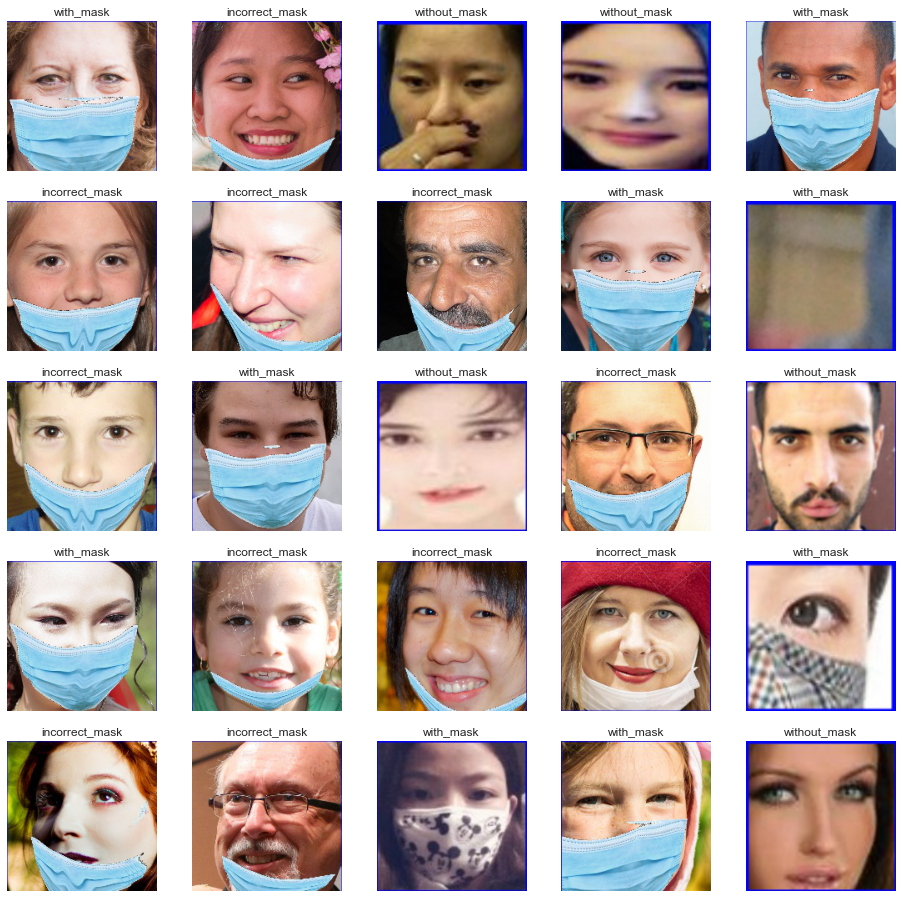

In [8]:
plt.figure(figsize = (16,16))

for i in range(25):
  image,label = train_data.next()

  plt.subplot(5,5,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")

In [9]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(180,180,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dense(64, activation="relu"),
                              layers.Dense(32, activation="relu"),
                              layers.Dense(16, activation="relu"),
                              layers.Dense(8, activation="relu"),
                              layers.Dropout(0.5),
    
                                
                              layers.Dense(3, activation= "softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 179, 179, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 88, 88, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0

In [11]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [12]:
# fitting data to the model

hist = model.fit(train_data,
          epochs = 100,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/100
296/296 [==============================] - 103s 348ms/step - loss: 0.6854 - accuracy: 0.7178 - val_loss: 0.4213 - val_accuracy: 0.8947
Epoch 2/100
296/296 [==============================] - 102s 344ms/step - loss: 0.5619 - accuracy: 0.7707 - val_loss: 0.3576 - val_accuracy: 0.9020
Epoch 3/100
296/296 [==============================] - 103s 348ms/step - loss: 0.4730 - accuracy: 0.7742 - val_loss: 0.2829 - val_accuracy: 0.8849
Epoch 4/100
296/296 [==============================] - 102s 344ms/step - loss: 0.3926 - accuracy: 0.8036 - val_loss: 0.2410 - val_accuracy: 0.9289
Epoch 5/100
296/296 [==============================] - 101s 343ms/step - loss: 0.3614 - accuracy: 0.8478 - val_loss: 0.1930 - val_accuracy: 0.9388
Epoch 6/100
296/296 [==============================] - 103s 347ms/step - loss: 0.3233 - accuracy: 0.8657 - val_loss: 0.1689 - val_accuracy: 0.9372
Epoch 7/100
296/296 [==============================] - 104s 350ms/step - loss: 0.3398 - accuracy: 0.8589 - val_loss: 0

296/296 [==============================] - 103s 348ms/step - loss: 0.2059 - accuracy: 0.9118 - val_loss: 0.0486 - val_accuracy: 0.9839
Epoch 57/100
296/296 [==============================] - 102s 344ms/step - loss: 0.2012 - accuracy: 0.9135 - val_loss: 0.0375 - val_accuracy: 0.9912
Epoch 58/100
296/296 [==============================] - 102s 344ms/step - loss: 0.1917 - accuracy: 0.9188 - val_loss: 0.0344 - val_accuracy: 0.9896
Epoch 59/100
296/296 [==============================] - 102s 345ms/step - loss: 0.2028 - accuracy: 0.9148 - val_loss: 0.0486 - val_accuracy: 0.9844
Epoch 60/100
296/296 [==============================] - 102s 345ms/step - loss: 0.2099 - accuracy: 0.9120 - val_loss: 0.0356 - val_accuracy: 0.9886
Epoch 61/100
296/296 [==============================] - 103s 347ms/step - loss: 0.1990 - accuracy: 0.9141 - val_loss: 0.0401 - val_accuracy: 0.9891
Epoch 62/100
296/296 [==============================] - 102s 343ms/step - loss: 0.1884 - accuracy: 0.9197 - val_loss: 0.0336 

In [13]:
model_evaluation = model.evaluate(test_data)
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

61/61 [==============================] - 5s 75ms/step - loss: 0.0629 - accuracy: 0.9798
Model Accuracy:  97.98 %


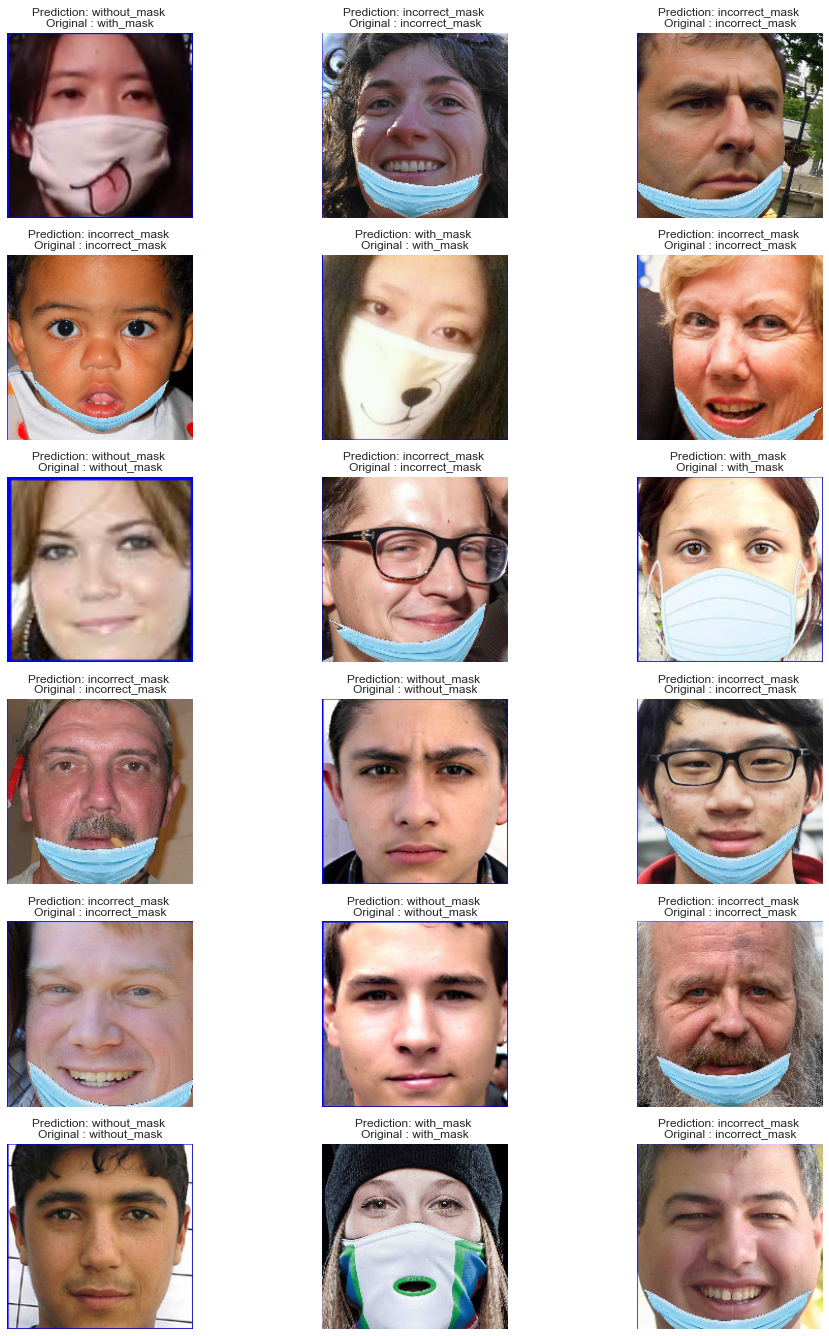

In [14]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image, label = test_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 179, 179, 64)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 88, 88, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 64)        16448     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0

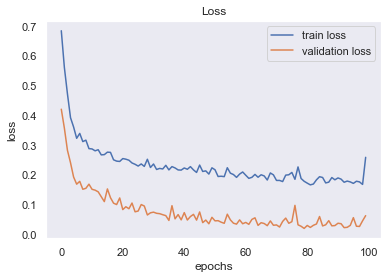

In [22]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')
plt.show()

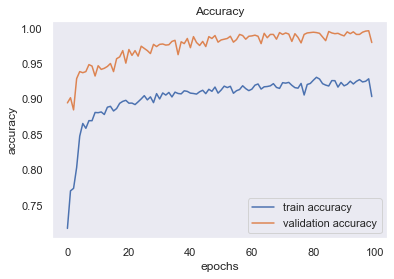

In [23]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')
plt.show()